In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flu-shot-prediction/training_set_features.csv
/kaggle/input/flu-shot-prediction/test_set_features.csv
/kaggle/input/flu-shot-prediction/training_set_labels.csv
/kaggle/input/flu-shot-prediction/submission_format.csv


In [2]:
data = pd.read_csv('/kaggle/input/flu-shot-prediction/training_set_features.csv')
labels = pd.read_csv('/kaggle/input/flu-shot-prediction/training_set_labels.csv')

In [3]:
cat_features = []
num_features = []
for i,val in data.dtypes.items():
    if val == 'object':
        cat_features.append(i)
    else:
        num_features.append(i)

In [4]:
num_data = data[num_features]
cat_data = data[cat_features]

In [5]:
num_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [6]:
cat_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [7]:
complete_data = data.merge(labels, on='respondent_id')

In [8]:
complete_data[complete_data['chronic_med_condition']==1][['h1n1_vaccine', 'seasonal_vaccine']].value_counts()

h1n1_vaccine  seasonal_vaccine
0             1                   2648
              0                   2634
1             1                   1752
              0                    256
dtype: int64

In [9]:
cat_data.drop(['hhs_geo_region','employment_industry','employment_occupation'],axis =1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
cat_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='h1n1_concern', ylabel='Density'>

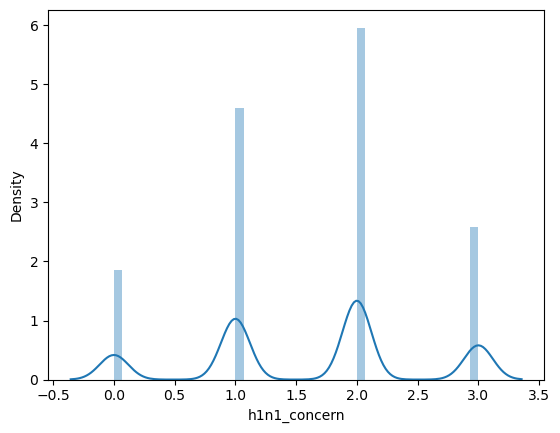

In [11]:
sns.distplot(data['h1n1_concern'])

In [12]:
num_data['h1n1_concern'].isna().sum()

92

In [13]:
num_data['h1n1_concern'].mode()

0    2.0
dtype: float64

## Imputation: h1n1_concern

In [14]:
h1_concern = num_data['h1n1_concern'].mode()[0]

In [15]:
num_data['h1n1_concern'].fillna(h1_concern, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
num_data['h1n1_concern'].isna().sum()

0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='h1n1_knowledge', ylabel='Density'>

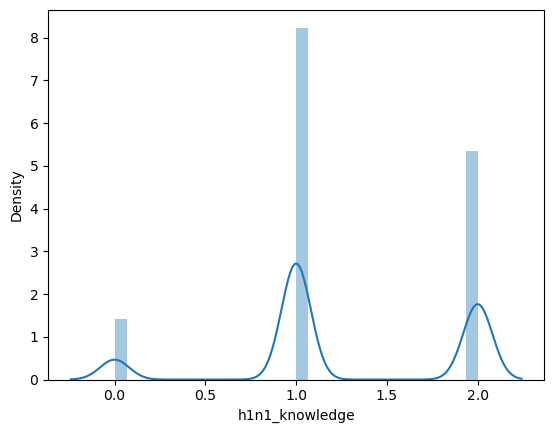

In [17]:
sns.distplot(num_data['h1n1_knowledge'])

In [18]:
num_data['h1n1_knowledge'].mode()

0    1.0
dtype: float64

## imputation: h1n1_knowledge

In [19]:
h1_knowledge = num_data['h1n1_knowledge'].mode()[0]

In [20]:
num_data['h1n1_knowledge'].fillna(h1_knowledge, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
num_data['h1n1_knowledge'].isna().sum()

0

In [22]:
num_data['behavioral_antiviral_meds'].isna().sum()

71

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='behavioral_antiviral_meds', ylabel='Density'>

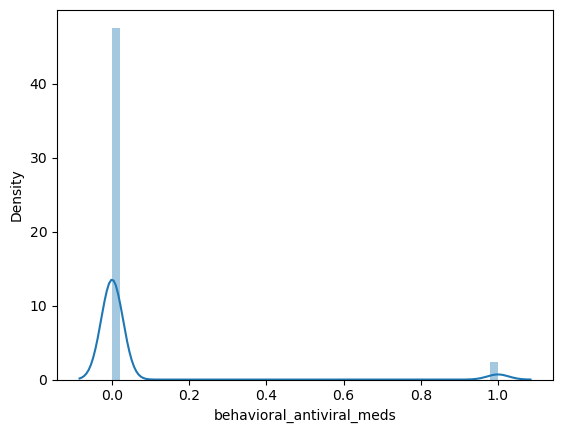

In [23]:
sns.distplot(num_data['behavioral_antiviral_meds'])

In [24]:
num_data['behavioral_antiviral_meds'].isna().sum()

71

In [25]:
num_data['behavioral_antiviral_meds'].mode()

0    0.0
dtype: float64

## imputation: behavioural_antiviral_meds

In [26]:
behav_anti = num_data['behavioral_antiviral_meds'].mode()[0]

In [27]:
num_data['behavioral_antiviral_meds'].fillna(behav_anti, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
num_data['behavioral_antiviral_meds'].isna().sum()

0

In [29]:
num_data['behavioral_avoidance'].isna().sum()

208

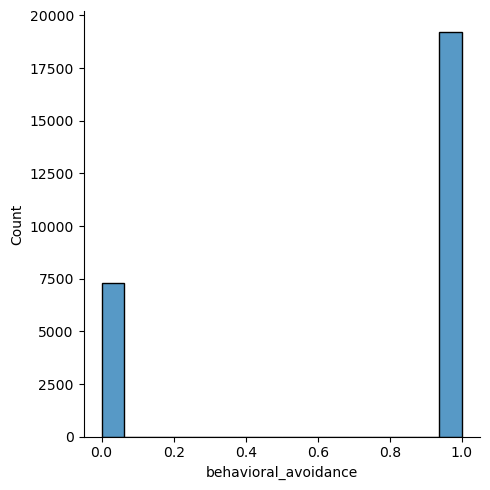

In [30]:
sns.displot(num_data['behavioral_avoidance'])

In [31]:
num_data['behavioral_avoidance'].mode()

0    1.0
dtype: float64

## imputation: behavioral_avoidance

In [32]:
behav_avoid = num_data['behavioral_avoidance'].mode()[0]

In [33]:
num_data['behavioral_avoidance'].fillna(behav_avoid, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
num_data['behavioral_avoidance'].isna().sum()

0

In [35]:
num_data['behavioral_face_mask'].isna().sum()

19

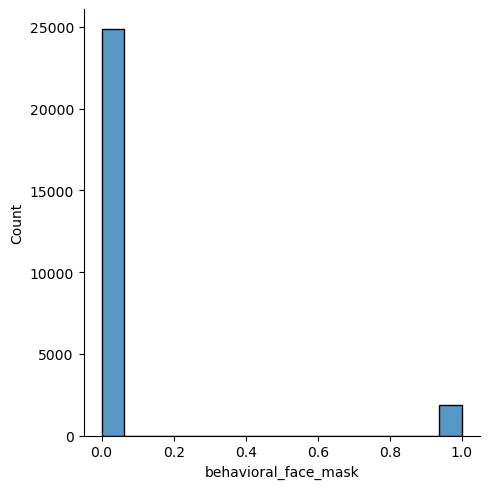

In [36]:
sns.displot(num_data['behavioral_face_mask'])

In [37]:
num_data['behavioral_face_mask'].mode()

0    0.0
dtype: float64

## imputation behavioral_facemask

In [38]:
behav_face = num_data['behavioral_face_mask'].mode()[0]

In [39]:
num_data['behavioral_face_mask'].fillna(behav_face,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [40]:
num_data['behavioral_face_mask'].isna().sum()

0

In [41]:
num_data['behavioral_wash_hands'].isna().sum()

42

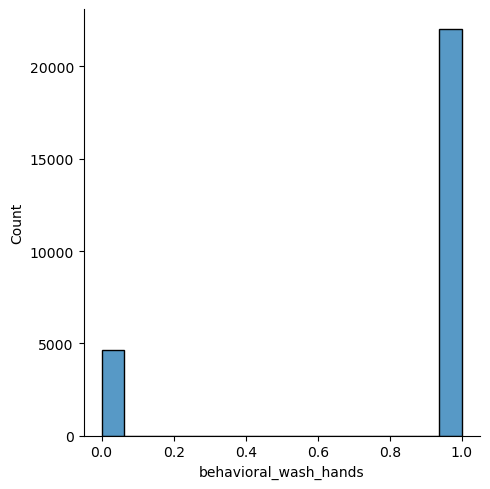

In [42]:
sns.displot(num_data['behavioral_wash_hands'])

In [43]:
num_data['behavioral_wash_hands'].mode()

0    1.0
dtype: float64

## imputation behavioral-wash_hands

In [44]:
behav_wash = num_data['behavioral_wash_hands'].mode()[0]

In [45]:
num_data['behavioral_wash_hands'].fillna(behav_wash,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
num_data['behavioral_wash_hands'].isna().sum()

0

In [47]:
num_data['behavioral_large_gatherings'].isna().sum()

87

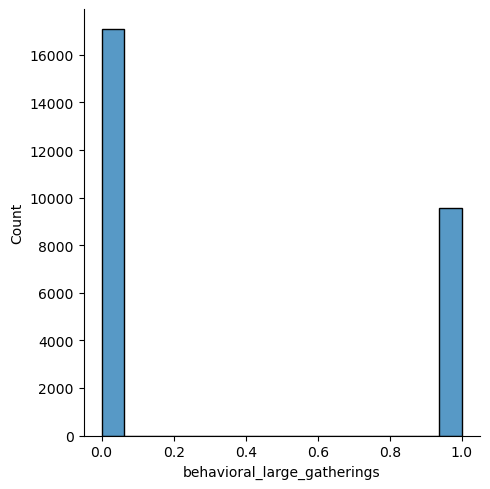

In [48]:
sns.displot(num_data['behavioral_large_gatherings'])

In [49]:
num_data['behavioral_large_gatherings'].mode()

0    0.0
dtype: float64

## imputation bhavioral_large_gatherings

In [50]:
behav_large = num_data['behavioral_large_gatherings'].mode()[0]

In [51]:
num_data['behavioral_large_gatherings'].fillna(behav_large, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [52]:
num_data['behavioral_large_gatherings'].isna().sum()

0

In [53]:
num_data['behavioral_outside_home'].isna().sum()

82

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='behavioral_outside_home', ylabel='Density'>

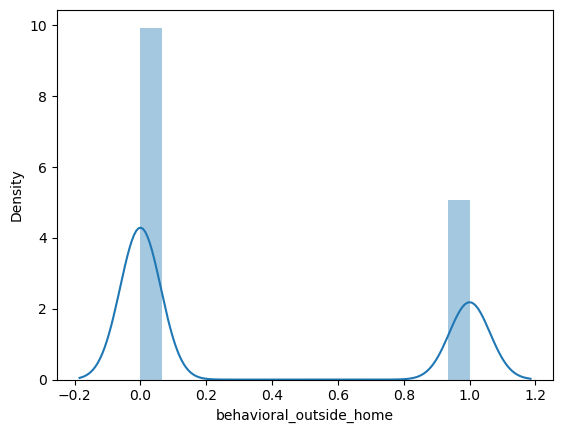

In [54]:
sns.distplot(num_data['behavioral_outside_home'])

In [55]:
num_data['behavioral_outside_home'].mode()

0    0.0
dtype: float64

## behaviroal_outside_home

In [56]:
behav_out = num_data['behavioral_outside_home'].mode()[0]

In [57]:
num_data['behavioral_outside_home'].fillna(behav_out, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
num_data['behavioral_outside_home'].isna().sum()

0

In [59]:
num_data['behavioral_touch_face'].isna().sum()

128

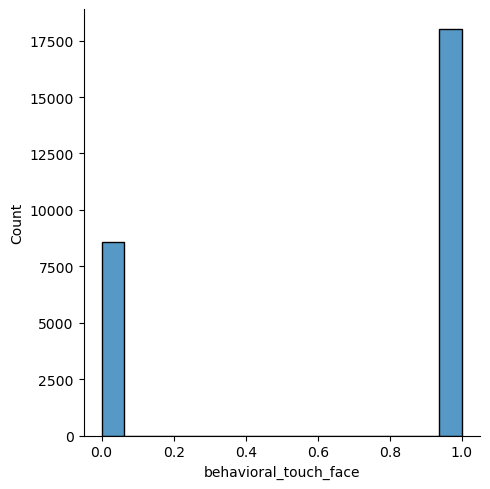

In [60]:
sns.displot(num_data['behavioral_touch_face'])

In [61]:
num_data['behavioral_touch_face'].mode()

0    1.0
dtype: float64

## imputation behavioral_touch_face

In [62]:
behav_touch = num_data['behavioral_touch_face'].mode()[0]

In [63]:
num_data['behavioral_touch_face'].fillna(behav_touch, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [64]:
num_data['behavioral_touch_face'].isna().sum()

0

In [65]:
num_data['doctor_recc_h1n1'].isna().sum()

2160

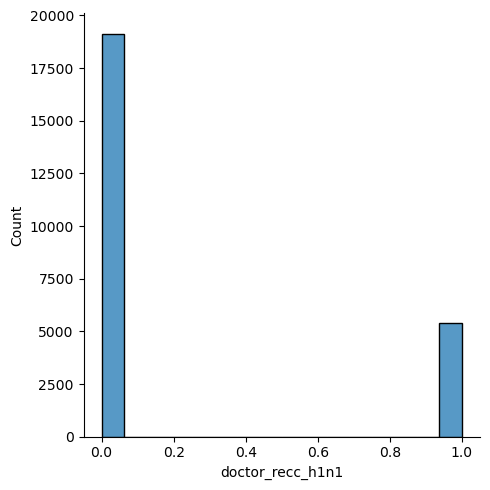

In [66]:
sns.displot(num_data['doctor_recc_h1n1'])

In [67]:
num_data['doctor_recc_h1n1'].mode()

0    0.0
dtype: float64

## imputation doctor_recc_h1n1

In [68]:
doc_recc_h1 = num_data['doctor_recc_h1n1'].mode()[0]

In [69]:
num_data['doctor_recc_h1n1'].fillna(doc_recc_h1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [70]:
num_data['doctor_recc_h1n1'].isna().sum()

0

In [71]:
num_data['doctor_recc_seasonal'].isna().sum()

2160

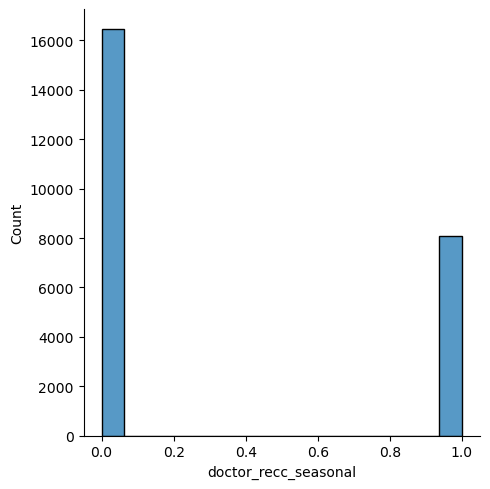

In [72]:
sns.displot(num_data['doctor_recc_seasonal'])

In [73]:
num_data['doctor_recc_seasonal'].mode()

0    0.0
dtype: float64

## imputation doctor_recc_seasonal

In [74]:
doc_recc_sea = num_data['doctor_recc_seasonal'].mode()[0]

In [75]:
num_data['doctor_recc_seasonal'].fillna(doc_recc_sea,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [76]:
num_data['doctor_recc_seasonal'].isna().sum()

0

In [77]:
num_data['chronic_med_condition'].isna().sum()

971

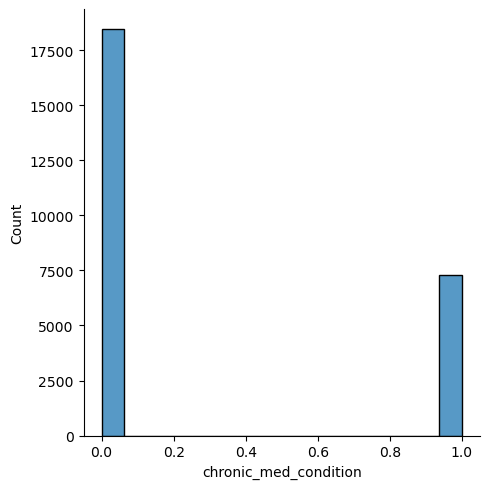

In [78]:
sns.displot(num_data['chronic_med_condition'])

In [79]:
num_data['chronic_med_condition'].mode()

0    0.0
dtype: float64

## imputation chronic_med_condition

In [80]:
chron_med = num_data['chronic_med_condition'].mode()[0]

In [81]:
num_data['chronic_med_condition'].fillna(chron_med, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [82]:
num_data['chronic_med_condition'].isna().sum()

0

In [83]:
num_data['child_under_6_months'].isna().sum()

820

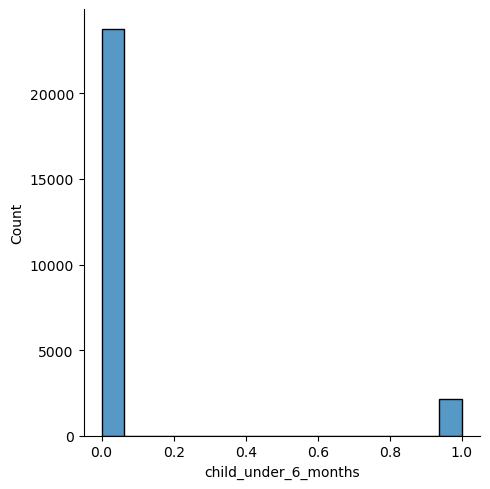

In [84]:
sns.displot(num_data['child_under_6_months'])

In [85]:
num_data['child_under_6_months'].mode()

0    0.0
dtype: float64

## imputation child_under_6_months

In [86]:
child_under = num_data['child_under_6_months'].mode()[0]

In [87]:
num_data['child_under_6_months'].fillna(child_under,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [88]:
num_data['child_under_6_months'].isna().sum()

0

In [89]:
num_data['health_worker'].isna().sum()

804

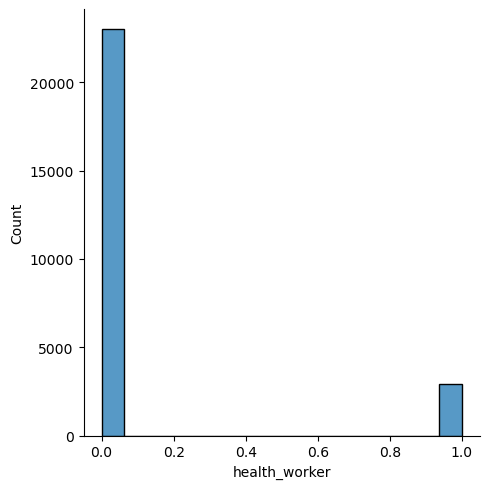

In [90]:
sns.displot(num_data['health_worker'])

In [91]:
num_data['health_worker'].mode()

0    0.0
dtype: float64

## imputation health_worker

In [92]:
health_work = num_data['health_worker'].mode()[0]

In [93]:
num_data['health_worker'].fillna(health_work, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [94]:
num_data['health_worker'].isna().sum()

0

In [95]:
num_data['health_insurance'].isna().sum()

12274

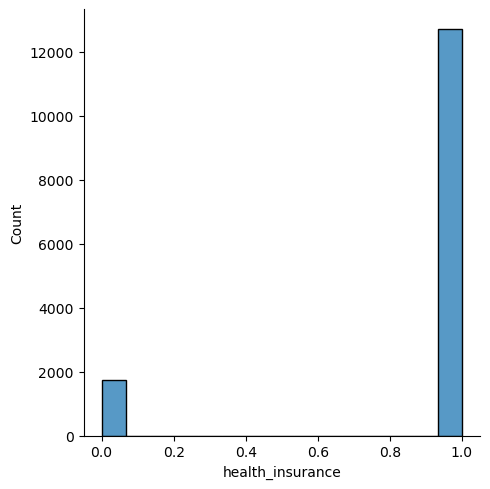

In [96]:
sns.displot(num_data['health_insurance'])

In [97]:
num_data['health_insurance'].mode()

0    1.0
dtype: float64

## imputation health_insurance

In [98]:
health_ins = num_data['health_insurance'].mode()[0]

In [99]:
num_data['health_insurance'].fillna(health_ins,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [100]:
num_data['health_insurance'].isna().sum()

0

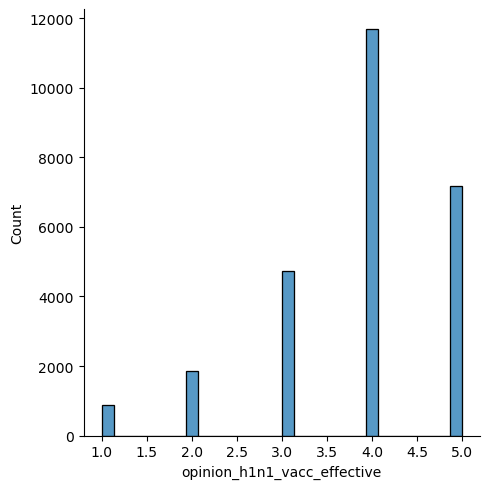

In [101]:
sns.displot(num_data['opinion_h1n1_vacc_effective'])

In [102]:
num_data['opinion_h1n1_vacc_effective'].mode()

0    4.0
dtype: float64

## imputation opinion_h1n1_vacc_effective

In [103]:
opi_h1_eff = num_data['opinion_h1n1_vacc_effective'].mode()[0]

In [104]:
num_data['opinion_h1n1_vacc_effective'].fillna(opi_h1_eff,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [105]:
num_data['opinion_h1n1_vacc_effective'].isna().sum()

0

In [106]:
num_data['opinion_h1n1_risk'].isna().sum()

388

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='opinion_h1n1_risk', ylabel='Density'>

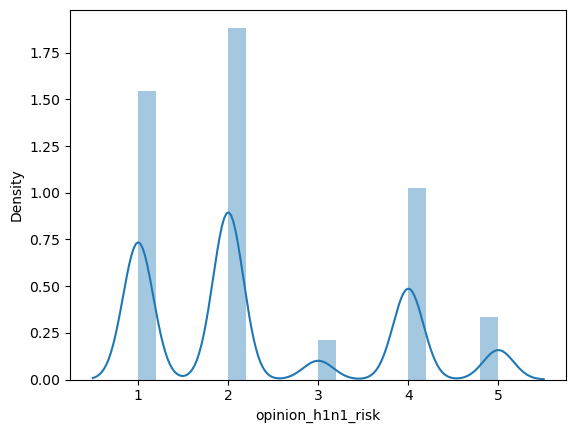

In [107]:
sns.distplot(num_data['opinion_h1n1_risk'])

In [108]:
num_data['opinion_h1n1_risk'].mode()

0    2.0
dtype: float64

## imputation opinion_h1n1_risk

In [109]:
opi_h1_risk = num_data['opinion_h1n1_risk'].mode()[0]

In [110]:
num_data['opinion_h1n1_risk'].fillna(opi_h1_risk,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [111]:
num_data['opinion_h1n1_risk'].isna().sum()

0

In [112]:
num_data['opinion_h1n1_sick_from_vacc'].isna().sum()

395

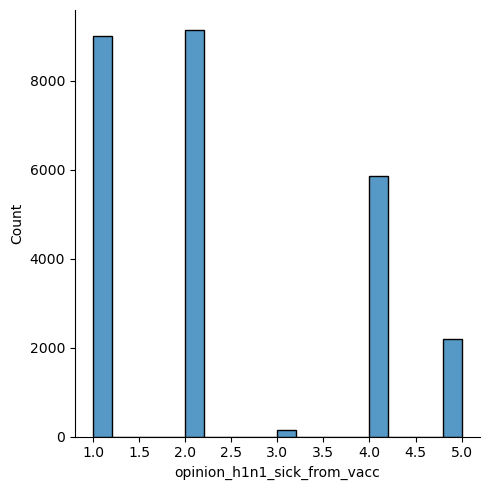

In [113]:
sns.displot(num_data['opinion_h1n1_sick_from_vacc'])

In [114]:
num_data['opinion_h1n1_sick_from_vacc'].mode()

0    2.0
dtype: float64

## imputation opinion_h1n1_sick_from_vacc

In [115]:
opi_h1_sick = num_data['opinion_h1n1_sick_from_vacc'].mode()[0]

In [116]:
num_data['opinion_h1n1_sick_from_vacc'].fillna(opi_h1_sick, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [117]:
num_data['opinion_h1n1_sick_from_vacc'].isna().sum()

0

In [118]:
num_data['opinion_seas_vacc_effective'].isna().sum()

462

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='opinion_seas_vacc_effective', ylabel='Density'>

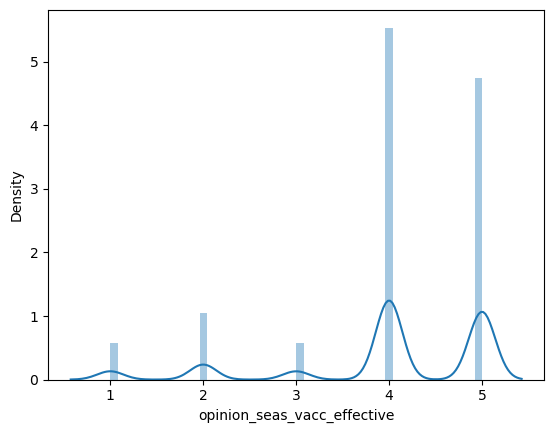

In [119]:
sns.distplot(num_data['opinion_seas_vacc_effective'])

In [120]:
num_data['opinion_seas_vacc_effective'].mode()

0    4.0
dtype: float64

## imputation opinion_seas_vacc_effective

In [121]:
opi_seas_eff = num_data['opinion_seas_vacc_effective'].mode()[0]

In [122]:
num_data['opinion_seas_vacc_effective'].fillna(opi_seas_eff,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [123]:
num_data['opinion_seas_vacc_effective'].isna().sum()

0

In [124]:
num_data['opinion_seas_risk'].isna().sum()

514

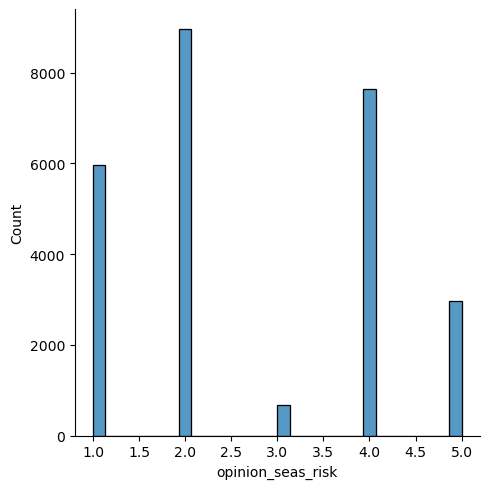

In [125]:
sns.displot(num_data['opinion_seas_risk'])

In [126]:
num_data['opinion_seas_risk'].mode()

0    2.0
dtype: float64

## imputation opinion_seas_risk

In [127]:
opi_seas_risk = num_data['opinion_seas_risk'].mode()[0]

In [128]:
num_data['opinion_seas_risk'].fillna(opi_seas_risk,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [129]:
num_data['opinion_seas_risk'].isna().sum()

0

In [130]:
num_data['opinion_seas_sick_from_vacc'].isna().sum()

537

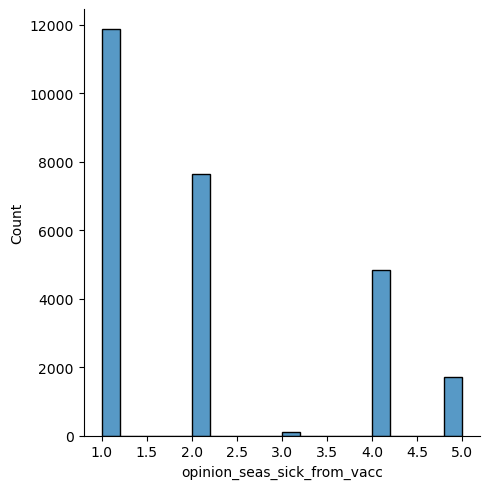

In [131]:
sns.displot(num_data['opinion_seas_sick_from_vacc'])

In [132]:
num_data['opinion_seas_sick_from_vacc'].mode()

0    1.0
dtype: float64

 ## imputaion opinion_seas_sick_from_vacc

In [133]:
opi_seas_sick = num_data['opinion_seas_sick_from_vacc'].mode()[0]

In [134]:
num_data['opinion_seas_sick_from_vacc'].fillna(opi_seas_sick, inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [135]:
num_data['opinion_seas_sick_from_vacc'].isna().sum()

0

In [136]:
num_data['household_adults'].isna().sum()

249

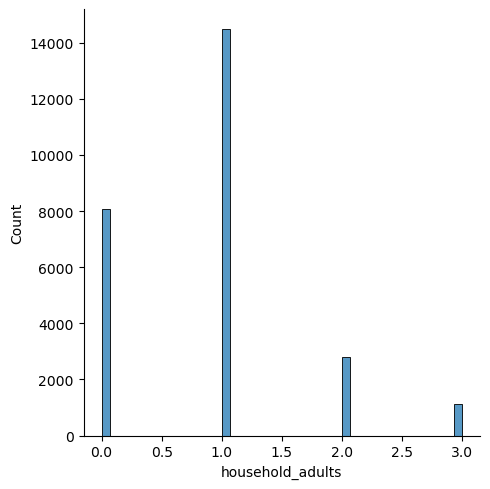

In [137]:
sns.displot(num_data['household_adults'])

In [138]:
num_data['household_adults'].mode()

0    1.0
dtype: float64

## imputation household_adults

In [139]:
house_adult = num_data['household_adults'].mode()[0]

In [140]:
num_data['household_adults'].fillna(house_adult, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [141]:
num_data['household_adults'].isna().sum()

0

In [142]:
num_data['household_children'].isna().sum()

249

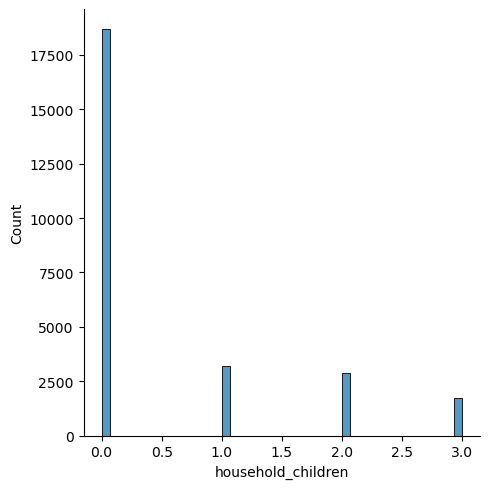

In [143]:
sns.displot(num_data['household_children'])

In [144]:
num_data['household_children'].mode()

0    0.0
dtype: float64

## imputation household_children

In [145]:
house_child = num_data['household_children'].mode()[0]

In [146]:
num_data['household_children'].fillna(house_child, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [147]:
num_data.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

In [148]:
num_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [149]:
imputation_list = [h1_concern,h1_knowledge,behav_anti,behav_avoid,behav_face,behav_large,behav_out,behav_touch,
                   behav_wash,doc_recc_h1,doc_recc_sea,chron_med, child_under,health_work,health_ins,opi_h1_eff,
                   opi_h1_risk,opi_h1_sick,opi_seas_eff,opi_seas_risk,opi_seas_sick,house_adult,house_child]

In [150]:
cat_data.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [151]:
cat_data.isna().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
census_msa              0
dtype: int64

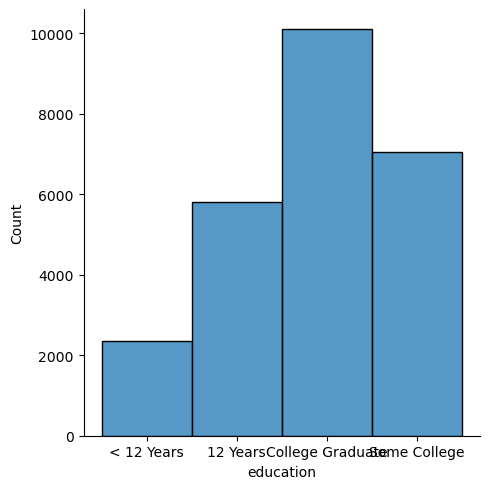

In [152]:
sns.displot(cat_data['education'])

In [153]:
cat_data['education'].mode()

0    College Graduate
dtype: object

In [154]:
fill_mode = cat_data['education'].mode()[0]

## imputation education

In [155]:
edu = cat_data['education'].mode()[0]


In [156]:
imputation_list.append(edu)

In [157]:
cat_data['education'].fillna(edu, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


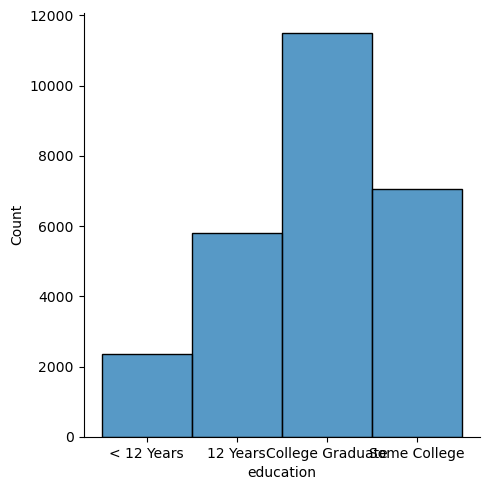

In [158]:
sns.displot(cat_data['education'])

In [159]:
cat_data.isna().mean()

age_group            0.000000
education            0.000000
race                 0.000000
sex                  0.000000
income_poverty       0.165612
marital_status       0.052720
rent_or_own          0.076459
employment_status    0.054780
census_msa           0.000000
dtype: float64

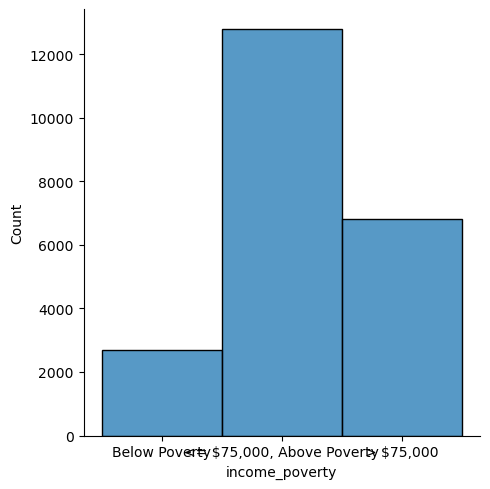

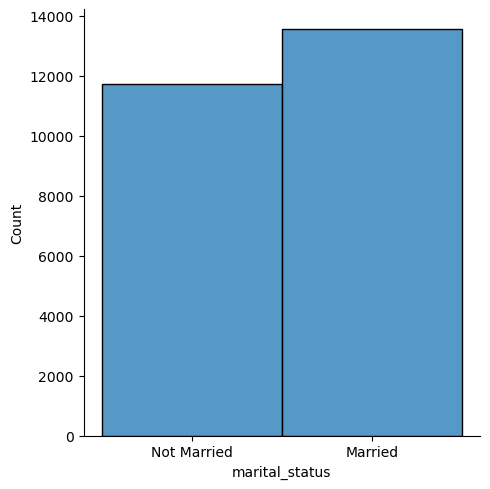

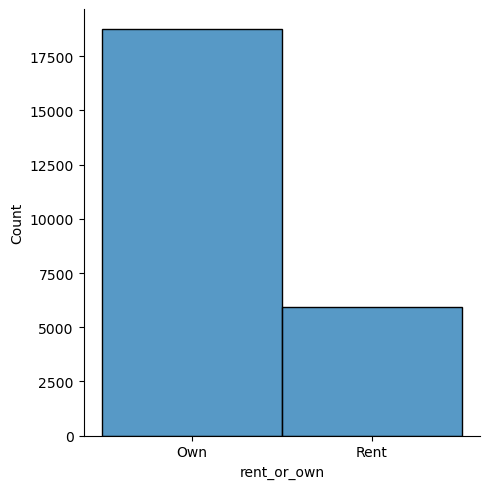

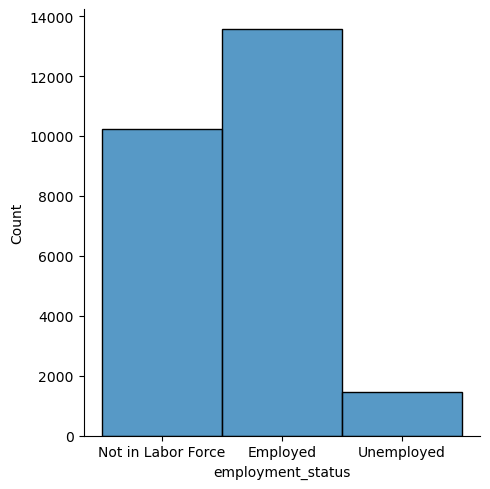

In [160]:
for i in cat_data.columns:
    if cat_data[i].isna().mean() != 0:
        sns.displot(cat_data[i])

In [161]:
cat1 = cat_data.copy()

In [162]:
#cat1['employment_industry'].value_counts()

In [163]:
#cat1['employment_industry'].mode()  

In [164]:
#sns.displot(cat1['employment_industry'].fillna(cat1['employment_industry'].mode()[0]))

In [165]:
#sns.displot(cat1['employment_industry'].fillna('missing'))

In [166]:
cat_data.isna().sum()

age_group               0
education               0
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
census_msa              0
dtype: int64

In [167]:
cat_data['income_poverty'].mode()

0    <= $75,000, Above Poverty
dtype: object

## imputation income_poverty

In [168]:
inc_pov = cat_data['income_poverty'].mode()[0]
imputation_list.append(inc_pov)


In [169]:
cat_data['income_poverty'].fillna(inc_pov, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


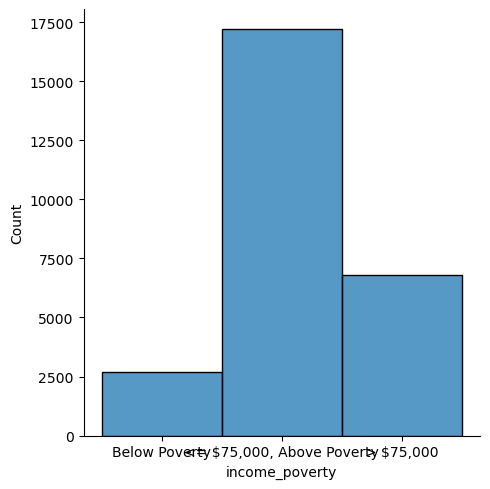

In [170]:
sns.displot(cat_data['income_poverty'])

In [171]:
cat_data.isna().sum()

age_group               0
education               0
race                    0
sex                     0
income_poverty          0
marital_status       1408
rent_or_own          2042
employment_status    1463
census_msa              0
dtype: int64

In [172]:
cat_data['marital_status'].mode()

0    Married
dtype: object

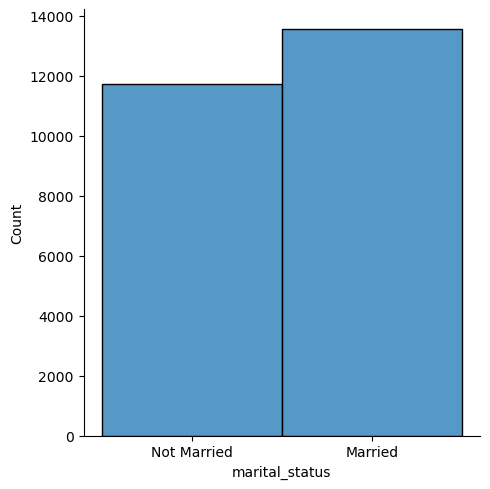

In [173]:
sns.displot(cat_data['marital_status'])

## imputation marital_status

In [174]:
mar_stat = cat_data['marital_status'].mode()[0]
imputation_list.append(mar_stat)


In [175]:
cat_data['marital_status'].fillna(mar_stat,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


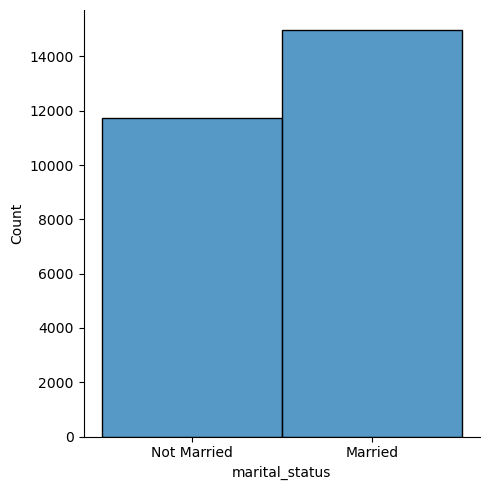

In [176]:
sns.displot(cat_data['marital_status'])

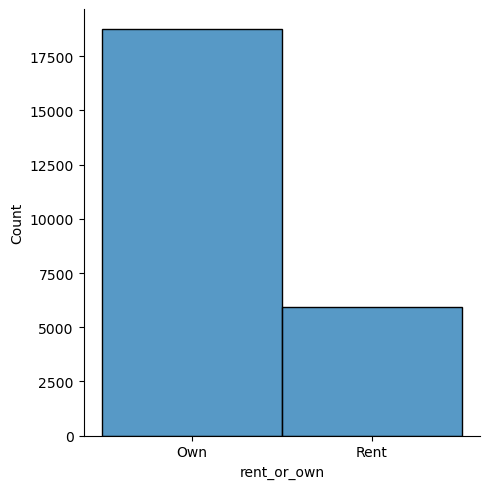

In [177]:
sns.displot(cat_data['rent_or_own'])

In [178]:
cat_data['rent_or_own'].mode()

0    Own
dtype: object

## imputation rent_or_own

In [179]:
rent_own = cat_data['rent_or_own'].mode()[0]
imputation_list.append(rent_own)


In [180]:
cat_data['rent_or_own'].fillna(rent_own,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


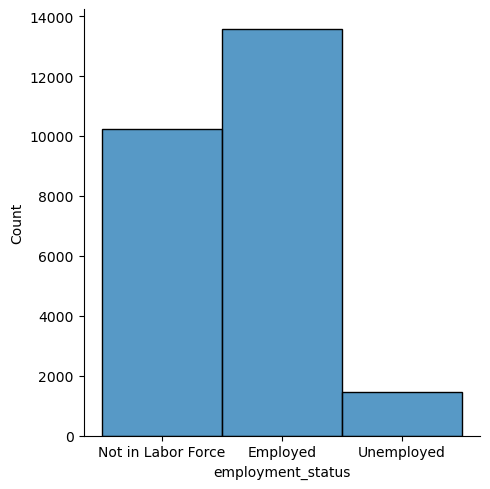

In [181]:
sns.displot(cat_data['employment_status'])

In [182]:
cat_data['employment_status'].mode()

0    Employed
dtype: object

## imputation employment_status

In [183]:
employ_stat = cat_data['employment_status'].mode()[0]
imputation_list.append(employ_stat)


In [184]:
cat_data['employment_status'].fillna(employ_stat, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [185]:
cat_data['employment_status'].isna().mean()

0.0

In [186]:
cat_data.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
census_msa           0
dtype: int64

# Encoding

In [187]:
cat_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [188]:
cat2 = cat_data.copy()

In [189]:
from sklearn import preprocessing

In [190]:
label_encoder = preprocessing.LabelEncoder()

In [191]:
cat2['sex'] = label_encoder.fit_transform(cat2['sex'])

In [192]:
cat2

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,0,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,1,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,1,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,0,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,0,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,0,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,1,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,0,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,0,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [193]:
cat_data['sex'] = label_encoder.fit_transform(cat_data['sex'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
cat_data['marital_status'] = label_encoder.fit_transform(cat_data['marital_status'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
cat_data['rent_or_own'] = label_encoder.fit_transform(cat_data['rent_or_own'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
cat_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,0,Below Poverty,1,0,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,1,Below Poverty,1,1,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,1,"<= $75,000, Above Poverty",1,0,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,0,Below Poverty,1,1,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,0,"<= $75,000, Above Poverty",0,0,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,0,"<= $75,000, Above Poverty",1,0,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,1,"<= $75,000, Above Poverty",1,1,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,0,"<= $75,000, Above Poverty",1,0,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,0,"<= $75,000, Above Poverty",0,1,Employed,Non-MSA


In [197]:
cat2 = cat_data.copy()

In [198]:
cat2['census_msa'].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [199]:
cat2.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'census_msa'],
      dtype='object')

In [200]:
cat2 = pd.get_dummies(cat2, columns = ['age_group', 'education', 'race', 'income_poverty', 'employment_status', 'census_msa'], drop_first = True)

In [201]:
num2 = num_data.copy()

In [202]:
complete_data1 = num2.join(cat2)

In [203]:
complete_data1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,sex,marital_status,rent_or_own,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [204]:
#complete_data1.drop('respondent_id', axis=1)

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


## h1n1 model

In [207]:
# X = complete_data1.iloc[:,1:]
# y = labels['h1n1_vaccine']

In [208]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [210]:
# from sklearn.linear_model import LogisticRegression

In [211]:
# logcv = LogisticRegression()

In [212]:
# logcv.fit(X_train,y_train)

In [213]:
# predictions = logcv.predict(X_test)

In [214]:
# predictions

In [215]:
# from sklearn.metrics import confusion_matrix, accuracy_score

In [216]:
# conf = confusion_matrix(y_test, predictions)

In [217]:
# conf

In [218]:
# accuracy_score(y_test, predictions)

In [219]:
# from sklearn.model_selection import GridSearchCV

In [220]:
# param_grid = {'C' : [10,100,1.0,0.1,0.01],
#              'solver' : ['newton-cg','lbfgs','liblinear'],
#              'penalty' : ['l2']}
# param_grid = {'C' : [10,100,1.0,0.1,0.01],
#              'solver' : ['liblinear'],
#              'penalty' : [ 'l1', 'l2'],
#              'max_iter': [100,200,500]}



# param_grid = {'C' : [10,100,1.0,0.1,0.01],
#              'solver' : ['liblinear','newton-cg','sag','saga'],
#              'penalty' : [ 'l1', 'l2'],
#              'max_iter': [1000,5000,10000]}
# grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)

# grid.fit(X_train, y_train)

In [221]:
# print(grid.best_params_)

In [222]:
# classifierLR = LogisticRegression(C= 0.1, max_iter= 1000, penalty= 'l1', solver= 'liblinear')
# classifierLR.fit(X_train,y_train)

In [223]:
# grid_pred = classifierLR.predict(X_test)

In [224]:
# accuracy_score(y_test, grid_pred)

In [225]:
# y_prob = classifierLR.predict_proba(X_test)[:,1]

In [226]:
# from sklearn.metrics import roc_auc_score

In [227]:
# roc_auc_score(y_test, y_prob)

## seasonal model

In [228]:
# X = complete_data1.iloc[:,1:]
# y1 = labels['seasonal_vaccine']

In [229]:
# X

In [230]:
# X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [231]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [232]:
# logr = LogisticRegression()

In [233]:
# logr.fit(X_train,y1_train)

In [234]:
# logr.fit(X_train,y1_train)

In [235]:
# pred = logr.predict(X_test)

In [236]:
# pred

In [237]:
# conf1 = confusion_matrix(y1_test, pred)

In [238]:
# conf1

In [239]:
# accuracy_score(y1_test, pred)

In [240]:
# param_grid1 = {'C' : [10,100,1.0,0.1,0.01],
#              'solver' : ['liblinear','sag','saga','newton-cg'],
#              'penalty' : [ 'l1', 'l2'],
#              'max_iter': [1000,5000,10000]}

In [241]:
# grid1 = GridSearchCV(LogisticRegression(), param_grid1, refit=True, verbose=3)

# grid1.fit(X_train, y1_train)

In [242]:
# print(grid1.best_params_)

In [243]:
# classifierLR1 = LogisticRegression(C= 0.1, max_iter= 1000, penalty= 'l1', solver= 'saga')
# classifierLR1.fit(X_train,y1_train)

In [244]:
# grid_pred1 = classifierLR1.predict(X_test)

In [245]:
# grid_pred1

In [246]:
# accuracy_score(y1_test, grid_pred1)

In [247]:
# y1_prob = classifierLR1.predict_proba(X_test)[:,1]

In [248]:
# roc_auc_score(y1_test, y1_prob)

## h1n1 random forest

In [249]:
complete_data1.iloc[:,1:]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,sex,marital_status,rent_or_own,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [250]:
X = complete_data1.iloc[:,1:]
y = labels['h1n1_vaccine']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rf = RandomForestClassifier()

In [255]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [256]:
prediction_h1n1 = rf.predict(X_test)

In [257]:
prediction_h1n1

array([0, 0, 0, ..., 0, 0, 0])

In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score

cfm_h1n1 = confusion_matrix(y_test, prediction_h1n1)

In [259]:
cfm_h1n1

array([[6034,  285],
       [1053,  641]])

In [260]:
accuracy_score(y_test, prediction_h1n1)

0.8330213403219768

In [261]:
from sklearn.metrics import roc_auc_score

In [262]:
roc_auc_score(y_test, prediction_h1n1)

0.6666461299134766

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
param_grid = {'n_estimators' : [200,500],
             'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' : ['gini','entropy']}

In [265]:
CV_rf = GridSearchCV(estimator=rf,param_grid=param_grid, cv = 5)

In [266]:
CV_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [267]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [268]:
rf_f = RandomForestClassifier(criterion = 'gini',max_depth = 8,max_features = 'auto',n_estimators = 500)

In [269]:
rf_f.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [270]:
rf_pred = rf_f.predict(X_test)

In [271]:
accuracy_score(y_test, rf_pred)

0.8327717459128916

In [272]:
y_prob = CV_rf.predict_proba(X_test)[:,1]

In [273]:
roc_auc_score(y_test, y_prob)

0.8258114010462627

## seasonal random forest

In [274]:
X = complete_data1.iloc[:,1:]
y1 = labels['seasonal_vaccine']

In [275]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [277]:
rf1 = RandomForestClassifier()

In [278]:
rf1.fit(X_train, y1_train)

RandomForestClassifier()

In [279]:
prediction_seasonal = rf1.predict(X_test)

In [280]:
prediction_seasonal

array([0, 0, 1, ..., 0, 0, 1])

In [281]:
from sklearn.metrics import confusion_matrix, accuracy_score

cfm_seasonal = confusion_matrix(y1_test, prediction_seasonal)

In [282]:
cfm_seasonal

array([[3501,  841],
       [ 944, 2727]])

In [283]:
accuracy_score(y1_test, prediction_seasonal)

0.7772369898914264

In [284]:
roc_auc_score(y1_test, prediction_seasonal)

0.7745799079292539

In [285]:
param_grid = {'n_estimators' : [200,500],
             'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8],
             'criterion' : ['gini','entropy']}

In [286]:
CV_rf_seasonal = GridSearchCV(estimator=rf1,param_grid=param_grid, cv = 5)

In [287]:
CV_rf_seasonal.fit(X_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [288]:
CV_rf_seasonal.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [289]:
rf_seasonal = RandomForestClassifier(criterion = 'gini',max_depth = 8,max_features = 'sqrt',n_estimators = 500)

In [290]:
rf_seasonal.fit(X_train,y1_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

In [291]:
rf_pred_seasonal = rf_seasonal.predict(X_test)

In [292]:
accuracy_score(y1_test, rf_pred_seasonal)

0.7789841507550231

In [293]:
y1_prob = CV_rf_seasonal.predict_proba(X_test)[:,1]

In [294]:
roc_auc_score(y1_test, y1_prob)

0.8503947618874942

## test set

In [295]:
test = pd.read_csv('/kaggle/input/flu-shot-prediction/test_set_features.csv')

In [296]:
test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [297]:
test.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [298]:
test.drop(['hhs_geo_region','employment_industry','employment_occupation'],axis = 1, inplace=True)

In [299]:
imputation_list = {'h1_concern':h1_concern,'h1_knowledge':h1_knowledge,'behav_anti':behav_anti,'behav_avoid':behav_avoid,'behav_face':behav_face,'behav_large':behav_large,'behav_out':behav_out,'behav_touch':behav_touch,
                   'behav_wash':behav_wash,'doc_recc_h1':doc_recc_h1,'doc_recc_sea':doc_recc_sea,'chron_med':chron_med, 'child_under':child_under,'health_work':health_work,'health_ins':health_ins,'opi_h1_eff':opi_h1_eff,
                   'opi_h1_risk':opi_h1_risk,'opi_h1_sick':opi_h1_sick,'opi_seas_eff':opi_seas_eff,'opi_seas_risk':opi_seas_risk,'opi_seas_sick':opi_seas_sick,'house_adult':house_adult,'house_child':house_child,'edu':edu,
                   'inc_pov':inc_pov,'mar_stat':mar_stat, 'rent_own':rent_own, 'employ_stat':employ_stat}

In [300]:
test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,"MSA, Principle City",1.0,1.0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,Non-MSA,1.0,3.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0


## test imputation

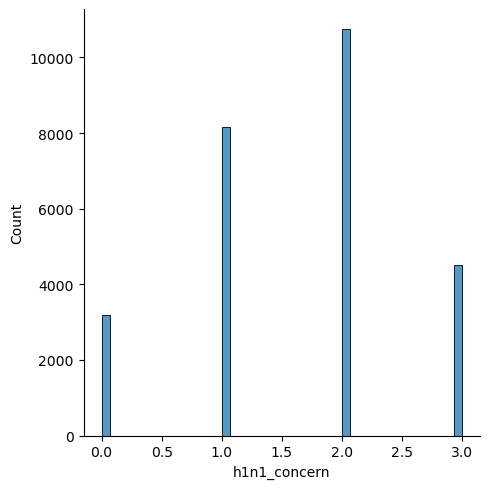

In [301]:
sns.displot(test['h1n1_concern'])

In [302]:
test['h1n1_concern'].fillna(imputation_list['h1_concern'],inplace=True)

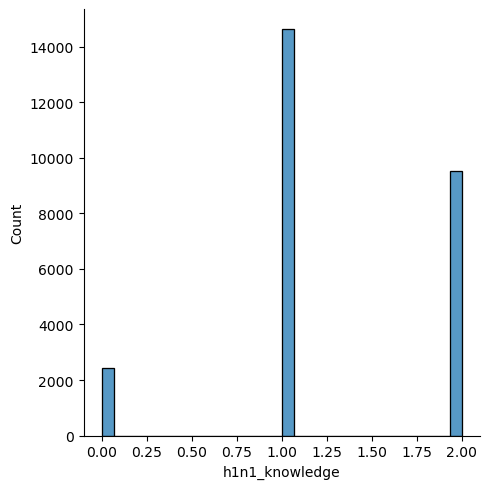

In [303]:
sns.displot(test['h1n1_knowledge'])

In [304]:
test['h1n1_knowledge'].fillna(imputation_list['h1_knowledge'],inplace=True)

In [305]:
test['behavioral_antiviral_meds'].fillna(imputation_list['behav_anti'],inplace=True)

In [306]:
test['behavioral_avoidance'].fillna(imputation_list['behav_avoid'],inplace=True)

In [307]:
test['behavioral_face_mask'].fillna(imputation_list['behav_face'],inplace=True)

In [308]:
test['behavioral_wash_hands'].fillna(imputation_list['behav_wash'],inplace=True)

In [309]:
test['behavioral_large_gatherings'].fillna(imputation_list['behav_large'],inplace=True)

In [310]:
test['behavioral_outside_home'].fillna(imputation_list['behav_out'],inplace=True)

In [311]:
test['behavioral_touch_face'].fillna(imputation_list['behav_touch'],inplace=True)

In [312]:
test['doctor_recc_h1n1'].fillna(imputation_list['doc_recc_h1'],inplace=True)

In [313]:
test['doctor_recc_seasonal'].fillna(imputation_list['doc_recc_sea'],inplace=True)

In [314]:
test['chronic_med_condition'].fillna(imputation_list['chron_med'],inplace=True)

In [315]:
test['child_under_6_months'].fillna(imputation_list['child_under'],inplace=True)

In [316]:
test['health_worker'].fillna(imputation_list['health_work'],inplace=True)

In [317]:
test['health_insurance'].fillna(imputation_list['health_ins'],inplace=True)

In [318]:
test['opinion_h1n1_vacc_effective'].fillna(imputation_list['opi_h1_eff'],inplace=True)

In [319]:
test['opinion_h1n1_risk'].fillna(imputation_list['opi_h1_risk'],inplace=True)

In [320]:
test['opinion_h1n1_sick_from_vacc'].fillna(imputation_list['opi_h1_sick'],inplace=True)

In [321]:
test['opinion_seas_vacc_effective'].fillna(imputation_list['opi_seas_eff'],inplace=True)

In [322]:
test['opinion_seas_risk'].fillna(imputation_list['opi_seas_risk'],inplace=True)

In [323]:
test['opinion_seas_sick_from_vacc'].fillna(imputation_list['opi_seas_sick'],inplace=True)

In [324]:
test['household_adults'].fillna(imputation_list['house_adult'], inplace=True)

In [325]:
test['household_children'].fillna(imputation_list['house_child'], inplace=True)

In [326]:
test['education'].fillna(imputation_list['edu'], inplace= True)

In [327]:
test['income_poverty'].fillna(imputation_list['inc_pov'], inplace=True)

In [328]:
test['marital_status'].fillna(imputation_list['mar_stat'],inplace=True)

In [329]:
test['rent_or_own'].fillna(imputation_list['rent_own'],inplace=True)

In [330]:
test['employment_status'].fillna(imputation_list['employ_stat'], inplace=True)

In [331]:
test.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa

## Encoding on test data

In [332]:
test['sex'] = label_encoder.fit_transform(test['sex'])

In [333]:
test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,0,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,1,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,1,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,0,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,0,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,College Graduate,White,0,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,1.0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,1,Below Poverty,Married,Rent,Employed,Non-MSA,1.0,3.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,0,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,0,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0


In [334]:
test['marital_status'].unique()

array(['Not Married', 'Married'], dtype=object)

In [335]:
test['marital_status'] = label_encoder.fit_transform(test['marital_status'])

In [336]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,0,"> $75,000",1,Rent,Employed,"MSA, Not Principle City",1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,1,Below Poverty,1,Rent,Employed,Non-MSA,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,1,"> $75,000",0,Own,Employed,Non-MSA,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,0,"<= $75,000, Above Poverty",0,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,0,"<= $75,000, Above Poverty",1,Own,Employed,Non-MSA,0.0,1.0


In [337]:
test['rent_or_own'] = label_encoder.fit_transform(test['rent_or_own'])

In [338]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,0,"> $75,000",1,1,Employed,"MSA, Not Principle City",1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,1,Below Poverty,1,1,Employed,Non-MSA,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,1,"> $75,000",0,0,Employed,Non-MSA,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,0,"<= $75,000, Above Poverty",0,0,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,0,"<= $75,000, Above Poverty",1,0,Employed,Non-MSA,0.0,1.0


In [339]:
test_f = pd.get_dummies(test, columns = ['age_group', 'education', 'race', 'income_poverty', 'employment_status', 'census_msa'], drop_first = True).iloc[:,1:]

In [340]:
seas_pred = rf_seasonal.predict_proba(test_f)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [341]:
h1_pred = rf_f.predict_proba(test_f)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [342]:
pd.DataFrame(data={'h1n1_vaccine': h1_pred, 'seasonal_vaccine': seas_pred}, index=test['respondent_id']).to_csv('submission2.csv')

In [343]:
# rf_f rf_seasonal